# **Diabetes Prediction**

I will be training a logistics regression model to predict diabetes. The dataset used in this project can be found [here](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

In [161]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import io

In [162]:
from google.colab import files
 
 
uploaded = files.upload()

Saving diabetes.csv to diabetes (4).csv


In [163]:
df = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [164]:
df.shape

(768, 9)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [166]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [167]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There are no missing values in the dataset and all the variables are numerical.

In [168]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### **Data Cleaning**

People can not have 0 as the value of Glucose, BloodPressure, SkinThickness, Insulin,BMI in their bodies. so, I will replace it with the average value in the data set

In [169]:
def replace_0(col):
  df[col] = df[col].replace(0,df[col].mean())

In [170]:
replace_0("Glucose")
replace_0("BloodPressure")
replace_0("SkinThickness")
replace_0("Insulin")
replace_0("BMI")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


 ### **Data Visualization**

Text(0.5, 1.0, 'Glucose Hist Plot')

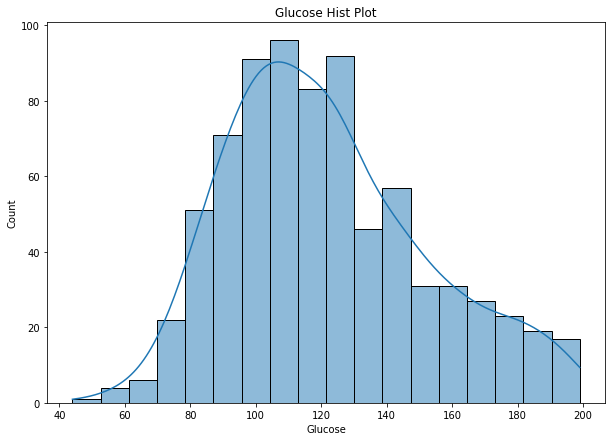

In [171]:
plt.figure(figsize =(10,7))
sb.histplot(data=df, x="Glucose", kde=True)
plt.title("Glucose Hist Plot")

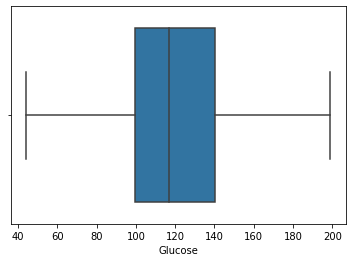

In [172]:
sb.boxplot(x=df["Glucose"])

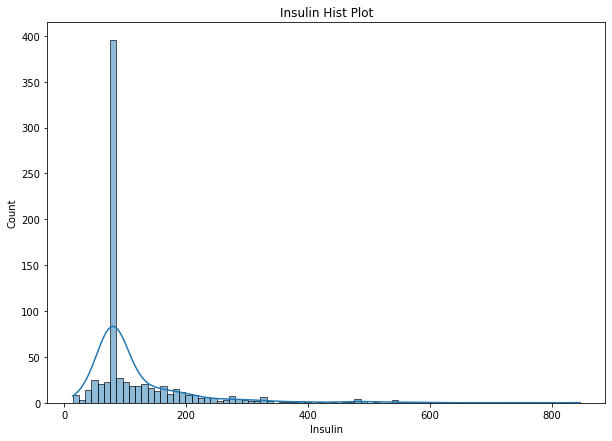

In [173]:
plt.figure(figsize =(10,7))
sb.histplot(data=df, x="Insulin", kde=True)
plt.title("Insulin Hist Plot")
plt.show()

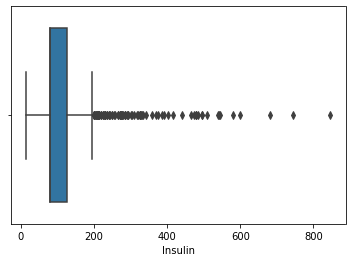

In [174]:
sb.boxplot(x=df["Insulin"])

Text(0.5, 1.0, 'BMI Hist Plot')

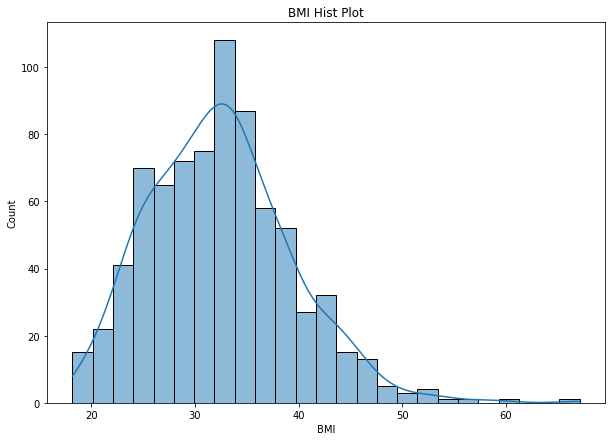

In [175]:
plt.figure(figsize =(10,7))
sb.histplot(data=df, x="BMI", kde=True)
plt.title("BMI Hist Plot")

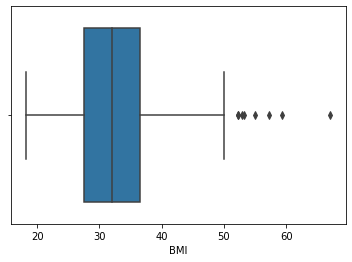

In [176]:
sb.boxplot(x=df["BMI"])

Text(0.5, 1.0, 'SkinThickness Hist Plot')

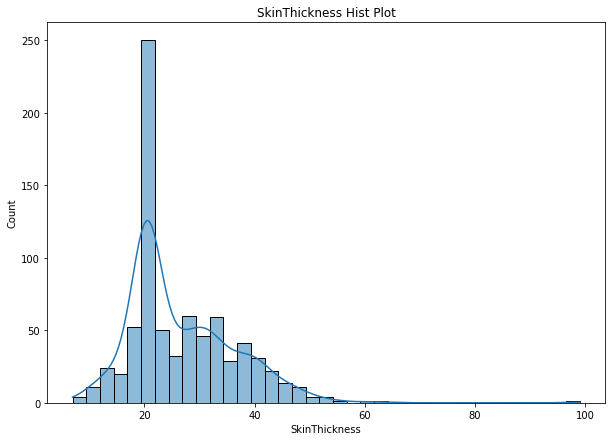

In [177]:
plt.figure(figsize =(10,7))
sb.histplot(data=df, x="SkinThickness", kde=True)
plt.title("SkinThickness Hist Plot")


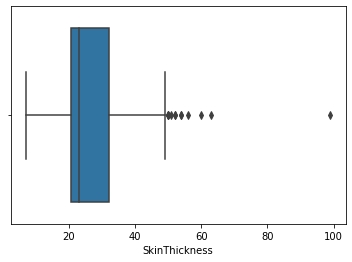

In [178]:
sb.boxplot(x=df["SkinThickness"])

In [179]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

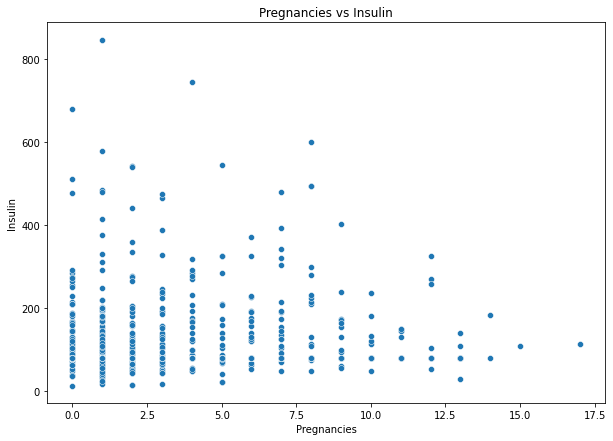

In [180]:
plt.figure(figsize =(10,7))
sb.scatterplot(
    data=df, x="Pregnancies", y="Insulin")
plt.title("Pregnancies vs Insulin")
plt.xlabel("Pregnancies")
plt.ylabel("Insulin")
plt.show()

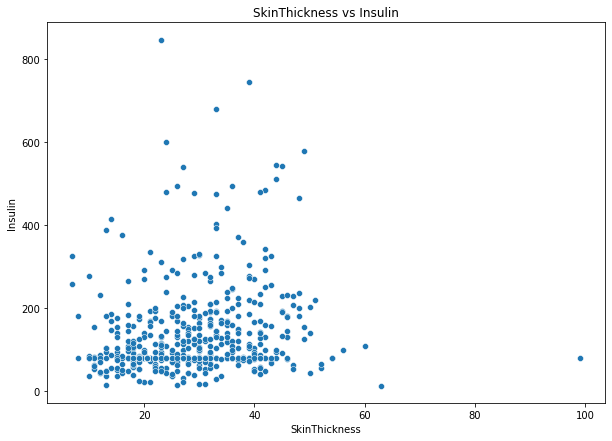

In [181]:
plt.figure(figsize =(10,7))
sb.scatterplot(
    data=df, x="SkinThickness", y="Insulin")
plt.title("SkinThickness vs Insulin")
plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.show()

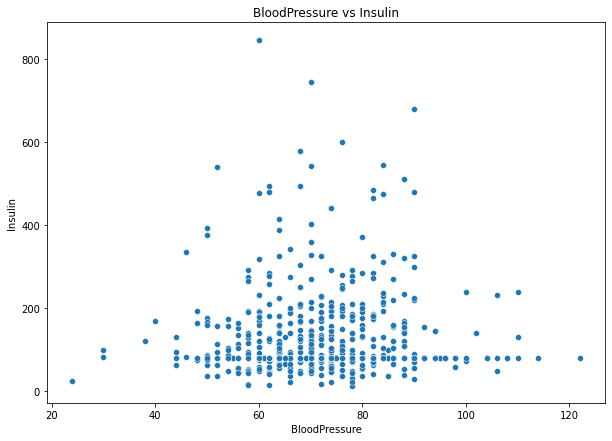

In [182]:
plt.figure(figsize =(10,7))
sb.scatterplot(
    data=df, x="BloodPressure", y="Insulin")
plt.title("BloodPressure vs Insulin")
plt.xlabel("BloodPressure")
plt.ylabel("Insulin")
plt.show()

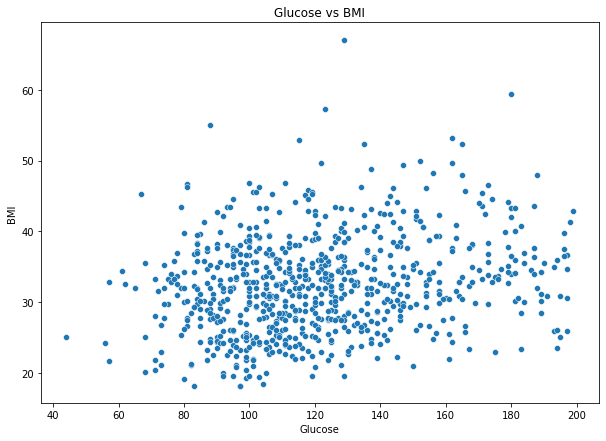

In [183]:
plt.figure(figsize =(10,7))
sb.scatterplot(
    data=df, x="Glucose", y="BMI")
plt.title("Glucose vs BMI")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.show()

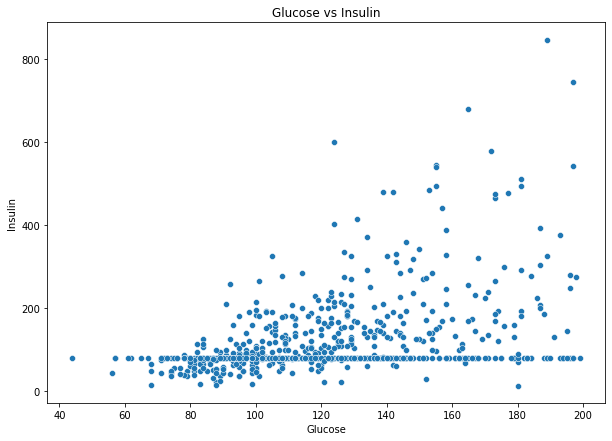

In [184]:
plt.figure(figsize =(10,7))
sb.scatterplot(
    data=df, x="Glucose", y="Insulin")
plt.title("Glucose vs Insulin")
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()

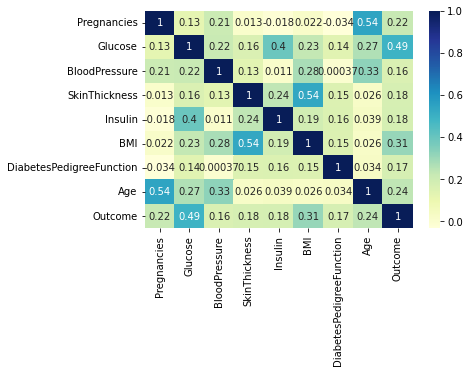

In [207]:
sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)

### **Data Splitting and Model fitting**

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
X = df.drop(["Outcome"],axis = 1)
y=df["Outcome"]

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [191]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84.0,69.105469,20.536458,79.799479,31.992578,0.304,21
618,9,112.0,82.000000,24.000000,79.799479,28.200000,1.282,50
346,1,139.0,46.000000,19.000000,83.000000,28.700000,0.654,22
294,0,161.0,50.000000,20.536458,79.799479,21.900000,0.254,65
231,6,134.0,80.000000,37.000000,370.000000,46.200000,0.238,46


In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [195]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [196]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [197]:
pipe.score(X_test, y_test)

0.7662337662337663

In [198]:
from sklearn.metrics import confusion_matrix,classification_report

In [200]:
predictions = pipe.predict(X_test)

In [201]:
cm = confusion_matrix(y_test,predictions)

In [202]:
cm

array([[83, 16],
       [20, 35]])

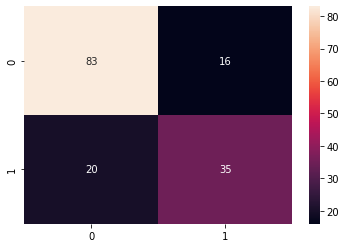

In [203]:
sb.heatmap(cm,annot=True)

In [205]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154

